In [8]:
from __future__ import print_function
__author__ = 'federica b bianco - CUSP NYU 2017'
__revised__ = '2018'

import os
import numpy as np
import pandas as pd
import seaborn
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/compute/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Code written to demonstrate various ways to read in a file in python for the PUI2016 lecture on data wrangling 

Uses 311 data: reports and complains issued by citizens to the NYC agencies
The data is downloaded in CSV format from [NYC open data](https://nycopendata.socrata.com/data?cat=business) and available on https://serv.cusp.nyu.edu/~fbianco/PUIdata

- 311_Service_Requests_from_2010_to_Present_short.csv is a reducted file which contains a subset of the variables (columns) id, date, zip, location in XY state coords, longitude, latitude, and contains 100 rows.
- 311_Service_Requests_from_2010_to_Present_head.csv contains all variables, but only 100 lines
-  311_Service_Requests_from_2010_to_Present.csv contains all variables all rows (34898). It is large and I only use it when I use pandas because with all other functions it is really slow!
- NYPD_7_Major_Felony_Incidents.csv is the crime data from NYPD also downloaded from [NYC open data](https://nycopendata.socrata.com/data?cat=business). Only the year 2015 is downloaded.

Note that there is a lot of output dumped. This is because I am trying to show how the data is formatted once ingested. Generally, an overwhealming output is as good as no output at all

### CUSP [PUI2017](https://serv.cusp.nyu.edu/~fbianco/PUI2017/)

# CSV

In [9]:
# use the environmental variable PUIDATA to access data 
# stored in your own PUIDATA directory
PUIdata = os.getenv('PUIDATA')

print (PUIdata)

/nfshome/fb55/PUIdata


In [10]:
# if None set it up:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
PUIdata = os.getenv('PUIDATA')

print (PUIdata)

/nfshome/fb55/PUIdata


In [79]:
# download the data from https://serv.cusp.nyu.edu/~fbianco/PUIdata/
# with curl and move it to PUI data
urlpath = "https://serv.cusp.nyu.edu/~fbianco/PUIdata/"
for f in ['311_Service_Requests_from_2010_to_Present_head.csv',
          '311_Service_Requests_from_2010_to_Present_short.csv',
          'NYPD_7_Major_Felony_Incidents.csv']:
    os.system("curl -O " + urlpath + f)
    os.system("mv " + f + ' ' + PUIdata)

In [80]:
!ls $PUIDATA

2015_station_data.csv
2015_status_data.csv
2015_trip_data.csv
2015_weather_data.csv
311_Service_Requests_from_2010_to_Present_head.csv
311_Service_Requests_from_2010_to_Present_short.csv
dhsdaily.csv
NYPD_7_Major_Felony_Incidents.csv
README.txt
test.tmp
test.txt


In [81]:
# with the package glob I can see the content of a directory 
# in a pythonic way
import glob
glob.glob(PUIdata + "/*")

['/nfshome/fb55/PUIdata/2015_station_data.csv',
 '/nfshome/fb55/PUIdata/2015_status_data.csv',
 '/nfshome/fb55/PUIdata/2015_weather_data.csv',
 '/nfshome/fb55/PUIdata/2015_trip_data.csv',
 '/nfshome/fb55/PUIdata/dhsdaily.csv',
 '/nfshome/fb55/PUIdata/README.txt',
 '/nfshome/fb55/PUIdata/NYPD_7_Major_Felony_Incidents.csv',
 '/nfshome/fb55/PUIdata/test.txt',
 '/nfshome/fb55/PUIdata/311_Service_Requests_from_2010_to_Present_head.csv',
 '/nfshome/fb55/PUIdata/test.tmp',
 '/nfshome/fb55/PUIdata/311_Service_Requests_from_2010_to_Present_short.csv']

## 1. readlines()

In [82]:
# opening the file the old fashion way: a C style read
fin = open(PUIdata + 
           "/311_Service_Requests_from_2010_to_Present_short.csv", 
           "r")

In [83]:
# within Python you can ask for help on a function or variable
# here readlines is a method of a File variable
fin.readlines?

Docstring:
readlines([size]) -> list of strings, each a line from the file.

Call readline() repeatedly and return a list of the lines so read.
The optional size argument, if given, is an approximate bound on the
total number of bytes in the lines returned.
Type:      builtin_function_or_method


In [84]:
too_shortcsv = fin.readlines()

In [85]:
type(too_shortcsv)

list

In [86]:
len(too_shortcsv)

100

In [87]:
type(too_shortcsv[0])

str

In [88]:
fin.close()

In [89]:
# I need to reopen the file to reread it cause redline marks how far it got
fin = open(PUIdata + 
           "/311_Service_Requests_from_2010_to_Present_short.csv", 
           "r")
for l in fin.readlines():
    print (l)
    

Unique Key,Created Date,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude

34212771,09/01/2016 12:00:06 AM,11413,1052223,185368,40.67520813178531,-73.75494944502233

34212392,09/01/2016 12:00:35 AM,10469,1023875,259913,40.87998640855491,-73.85670741555177

34214520,09/01/2016 12:00:37 AM,11369,1019812,217879,40.76463242381882,-73.87162284918391

34212483,09/01/2016 12:00:54 AM,10466,1025510,261946,40.885558858976104,-73.85078238918491

34214231,09/01/2016 12:01:15 AM,10040,1003750,254115,40.864140093130686,-73.92950060219349

34223410,09/01/2016 12:02:00 AM,10031,996684,238064,40.820097574803015,-73.95507644617044

34219357,09/01/2016 12:02:00 AM,11365,1041679,208204,40.73796206550144,-73.79276687084037

34211394,09/01/2016 12:02:03 AM,11103,1007798,217595,40.76389308093824,-73.91499378600639

34217294,09/01/2016 12:02:07 AM,10468,1013623,255108,40.86683824468553,-73.89380189150275

34213164,09/01/2016 12:03:16 AM,11222,998402,202531,40.7225662037401

## 2. readline()

In [90]:
fin = open(PUIdata + 
           "/311_Service_Requests_from_2010_to_Present_short.csv",
           "r")
fin.readline?

Docstring:
readline([size]) -> next line from the file, as a string.

Retain newline.  A non-negative size argument limits the maximum
number of bytes to return (an incomplete line may be returned then).
Return an empty string at EOF.
Type:      builtin_function_or_method


In [91]:
fin.readline()

'Unique Key,Created Date,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude\n'

In [92]:
fin.readline()

'34212771,09/01/2016 12:00:06 AM,11413,1052223,185368,40.67520813178531,-73.75494944502233\n'

In [93]:
fin.close()

## 3. read()

In [94]:
fin = open(PUIdata + 
           "/311_Service_Requests_from_2010_to_Present_short.csv", 
           "r")
fin.read?
fin.close()

Docstring:
read([size]) -> read at most size bytes, returned as a string.

If the size argument is negative or omitted, read until EOF is reached.
Notice that when in non-blocking mode, less data than what was requested
may be returned, even if no size parameter was given.
Type:      builtin_function_or_method


In [95]:
# this syntax "with open(filename) as fin" 
# will keep the file open while neeeded then close it automatically
with open(PUIdata + 
          "/311_Service_Requests_from_2010_to_Present_short.csv") as fin:
    toodata = fin.read()
print (toodata)

Unique Key,Created Date,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
34212771,09/01/2016 12:00:06 AM,11413,1052223,185368,40.67520813178531,-73.75494944502233
34212392,09/01/2016 12:00:35 AM,10469,1023875,259913,40.87998640855491,-73.85670741555177
34214520,09/01/2016 12:00:37 AM,11369,1019812,217879,40.76463242381882,-73.87162284918391
34212483,09/01/2016 12:00:54 AM,10466,1025510,261946,40.885558858976104,-73.85078238918491
34214231,09/01/2016 12:01:15 AM,10040,1003750,254115,40.864140093130686,-73.92950060219349
34223410,09/01/2016 12:02:00 AM,10031,996684,238064,40.820097574803015,-73.95507644617044
34219357,09/01/2016 12:02:00 AM,11365,1041679,208204,40.73796206550144,-73.79276687084037
34211394,09/01/2016 12:02:03 AM,11103,1007798,217595,40.76389308093824,-73.91499378600639
34217294,09/01/2016 12:02:07 AM,10468,1013623,255108,40.86683824468553,-73.89380189150275
34213164,09/01/2016 12:03:16 AM,11222,998402,202531,40.7225662037401,-73.94894

In [96]:
type(toodata)

str

## 4. storing the data after reading it

In [97]:
# remember 311shortcsv was csv file read in as a list of 100 strings, 
# each a row, with readlines()

# each row is a string
# split a string at the comma and make each row a list of strings
print (too_shortcsv[0].split(','))

['Unique Key', 'Created Date', 'Incident Zip', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Latitude', 'Longitude\n']


In [98]:
#now do it for all rows and store the strings in a list alldata
alldata = []
for l in too_shortcsv:
    data = l.split(',')
    alldata.append(data)

In [99]:
alldata

[['Unique Key',
  'Created Date',
  'Incident Zip',
  'X Coordinate (State Plane)',
  'Y Coordinate (State Plane)',
  'Latitude',
  'Longitude\n'],
 ['34212771',
  '09/01/2016 12:00:06 AM',
  '11413',
  '1052223',
  '185368',
  '40.67520813178531',
  '-73.75494944502233\n'],
 ['34212392',
  '09/01/2016 12:00:35 AM',
  '10469',
  '1023875',
  '259913',
  '40.87998640855491',
  '-73.85670741555177\n'],
 ['34214520',
  '09/01/2016 12:00:37 AM',
  '11369',
  '1019812',
  '217879',
  '40.76463242381882',
  '-73.87162284918391\n'],
 ['34212483',
  '09/01/2016 12:00:54 AM',
  '10466',
  '1025510',
  '261946',
  '40.885558858976104',
  '-73.85078238918491\n'],
 ['34214231',
  '09/01/2016 12:01:15 AM',
  '10040',
  '1003750',
  '254115',
  '40.864140093130686',
  '-73.92950060219349\n'],
 ['34223410',
  '09/01/2016 12:02:00 AM',
  '10031',
  '996684',
  '238064',
  '40.820097574803015',
  '-73.95507644617044\n'],
 ['34219357',
  '09/01/2016 12:02:00 AM',
  '11365',
  '1041679',
  '208204',
  '4

## 5. numpy methods: genfromtxt and loadtxt

In [100]:
# these are numpy functions, generally they are designed to read numbers

In [101]:
np.genfromtxt?

Signature: np.genfromtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None)
Docstring:
Load data from a text file, with missing values handled as specified.

Each line past the first `skip_header` lines is split at the `delimiter`
character, and characters following the `comments` character are discarded.

Parameters
----------
fname : file or str
    File, filename, or generator to read.  If the filename extension is
    `.gz` or `.bz2`, the file is first decompressed. Note that
    generators must return byte strings in Python 3k.
dtype : dtype, optional
    Data type of the resulting array.
    If None, the dtypes will be determined by the contents of each
    column, individuall

In [102]:
# reading NUMERICAL ONLY  data 
data = np.genfromtxt(PUIdata + 
                     "/311_Service_Requests_from_2010_to_Present_short.csv",
                     delimiter = ',', usecols=(0,2,3,4,5,6))
type(data)

numpy.ndarray

In [103]:
data[0]

array([ nan,  nan,  nan,  nan,  nan,  nan])

In [104]:
data[1]

array([  3.42127710e+07,   1.14130000e+04,   1.05222300e+06,
         1.85368000e+05,   4.06752081e+01,  -7.37549494e+01])

In [105]:
data.shape

(100, 6)

In [106]:
# skip the header, cause they are not numbers and numpy cant deal well with it
# reading NUMERICAL ONLY  data 
data = np.genfromtxt(PUIdata + 
                     "/311_Service_Requests_from_2010_to_Present_short.csv",
                     delimiter = ',', usecols=(0,2,3,4,5,6), skip_header=1)
data.shape

(99, 6)

In [107]:
data[0]

array([  3.42127710e+07,   1.14130000e+04,   1.05222300e+06,
         1.85368000e+05,   4.06752081e+01,  -7.37549494e+01])

In [108]:
# reading NUMERICAL ONLY  data while unpacking it
data = np.genfromtxt(PUIdata + "/311_Service_Requests_from_2010_to_Present_short.csv",
                     delimiter = ',', usecols=(0,2,3,4,5,6), skip_header=1, 
                    unpack = True)
data.shape

(6, 99)

In [109]:
data[0]

array([ 34212771.,  34212392.,  34214520.,  34212483.,  34214231.,
        34223410.,  34219357.,  34211394.,  34217294.,  34213164.,
        34212770.,  34214130.,  34217841.,  34212954.,  34216160.,
        34216500.,  34221835.,  34211702.,  34219447.,  34217113.,
        34214548.,  34221511.,  34217276.,  34217959.,  34210942.,
        34213767.,  34214112.,  34212140.,  34216046.,  34214014.,
        34216956.,  34226414.,  34224524.,  34217709.,  34218143.,
        34222231.,  34217303.,  34213421.,  34215972.,  34222268.,
        34221144.,  34213744.,  34224352.,  34223699.,  34213166.,
        34212338.,  34210938.,  34216167.,  34216756.,  34213978.,
        34216504.,  34213839.,  34217179.,  34216324.,  34211957.,
        34211967.,  34212999.,  34214166.,  34214406.,  34213441.,
        34225420.,  34215208.,  34211102.,  34211752.,  34224255.,
        34216968.,  34216052.,  34225272.,  34222223.,  34218580.,
        34211701.,  34218966.,  34223817.,  34218182.,  342161

In [110]:
# reading hybrid data by passing a dictionary of types
data =  np.genfromtxt(PUIdata + "/311_Service_Requests_from_2010_to_Present_short.csv",
                     delimiter = ',', dtype={'names':['id', 'date', 'zip','x','y','lat','lon'], 
                                             'formats':['d', 'S22', 'd', 'd', 'd', 'f', 'f']}, 
                      skip_header = 1)
type(data)

numpy.ndarray

In [111]:
data[0]

(34212771.0, '09/01/2016 12:00:06 AM', 11413.0, 1052223.0, 185368.0, 40.675209045410156, -73.75495147705078)

In [112]:
data[1]

(34212392.0, '09/01/2016 12:00:35 AM', 10469.0, 1023875.0, 259913.0, 40.87998580932617, -73.85670471191406)

In [113]:
for entry in data[1]:
    print (type(entry))

<type 'numpy.float64'>
<type 'numpy.string_'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float32'>
<type 'numpy.float32'>


## 6. the allmighty pandas data reader

panda is a very powerful and very efficient (computationally) python package to read and manipulate tabular data. 
(but in general if your data is highly dimensional it is not the best options, cause tables are inherently 2D)
See this notebook https://github.com/fedhere/UInotebooks/blob/master/dataWrangling/PandasDataWrangling-Chap7.ipynb 

for a complete transcription of the data manipulation chapter in 
Python for Data Analysis 
http://shop.oreilly.com/product/0636920023784.do 

which is essentially a pandas manual

In [114]:
# there is an function to read a csv file with pandas
pd.read_csv?

Signature: pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)
Docstring:
Read CSV (comma-separated) file 

In [115]:
df1 = pd.read_csv(PUIdata + 
                  "/311_Service_Requests_from_2010_to_Present_head.csv")

In [116]:
# I can also pass it a url, then I do not have to worry about downloading and moving data!
df1 = pd.read_csv(
    "http://cosmo.nyu.edu/~fb55/PUI2016/data/311_Service_Requests_from_2010_to_Present.csv")

In [117]:
#pandas read_csv will read in the file into a dataframe. 
#A dataframe has names for each column and each row 
df1.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

In [118]:
# I can call a column by its name to extract its values
df1['Resolution Description']

0        The Police Department responded to the complai...
1        The Police Department reviewed your complaint ...
2        The Police Department responded and upon arriv...
3        The Police Department issued a summons in resp...
4        The Department of Transportation inspected thi...
5        The Department of Environmental Protection det...
6        The Department of Sanitation investigated this...
7        The Taxi and Limousine Commission will contact...
8        The Police Department responded to the complai...
9        The Police Department responded to the complai...
10       The Police Department responded to the complai...
11       The Police Department responded and upon arriv...
12       The Taxi and Limousine Commission will contact...
13       The Police Department responded and upon arriv...
14       The Police Department responded to the complai...
15       The Police Department responded and upon arriv...
16       The following complaint conditions are still o.

In [119]:
df1['Complaint Type']

0               Noise - Residential
1                  Blocked Driveway
2                  Blocked Driveway
3                  Blocked Driveway
4                  Street Condition
5                      Water System
6              Sanitation Condition
7                    Taxi Complaint
8               Noise - Residential
9                Noise - Commercial
10               Noise - Commercial
11                  Illegal Parking
12                   Taxi Complaint
13                  Illegal Parking
14                  Illegal Parking
15                 Blocked Driveway
16                   HEAT/HOT WATER
17          Noise - Street/Sidewalk
18                     Water System
19                  Illegal Parking
20                 Street Condition
21                 Dirty Conditions
22                            Forms
23          Noise - Street/Sidewalk
24              Noise - Residential
25                 Street Condition
26                  Illegal Parking
27                          

### 6a. minimal gymnastics with pandas dataframes: selecting values by content

In [120]:
# Identify the Noise complaints. 
df1['Complaint Type'].str.contains("Noise")

0         True
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8         True
9         True
10        True
11       False
12       False
13       False
14       False
15       False
16       False
17        True
18       False
19       False
20       False
21       False
22       False
23        True
24        True
25       False
26       False
27       False
28        True
29        True
         ...  
34867     True
34868    False
34869     True
34870    False
34871    False
34872    False
34873     True
34874    False
34875    False
34876     True
34877     True
34878    False
34879     True
34880     True
34881     True
34882     True
34883     True
34884     True
34885     True
34886    False
34887     True
34888    False
34889     True
34890     True
34891     True
34892     True
34893     True
34894    False
34895    False
34896     True
Name: Complaint Type, Length: 34897, dtype: bool

In [121]:
# Select from the dataframe the noise complaints
dfNoise = df1[df1['Complaint Type'].str.contains("Noise")]

In [122]:
dfNoise.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,34212771,09/01/2016 12:00:06 AM,09/01/2016 06:02:10 AM,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11413.0,137-47 CARSON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675208,-73.754949,"(40.67520813178531, -73.75494944502233)"
8,34217294,09/01/2016 12:02:07 AM,09/01/2016 03:46:46 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10468.0,2685 GRAND CONCOURSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.866838,-73.893802,"(40.86683824468553, -73.89380189150275)"
9,34213164,09/01/2016 12:03:16 AM,09/01/2016 03:46:38 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11222.0,284 DRIGGS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.722566,-73.948944,"(40.7225662037401, -73.94894420645994)"
10,34212770,09/01/2016 12:03:35 AM,09/01/2016 03:46:28 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11249.0,149 NORTH 6 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.717440,-73.958558,"(40.717440110199995, -73.95855823667199)"
17,34211702,09/01/2016 12:06:56 AM,09/01/2016 04:59:06 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11221.0,194 STUYVESANT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688583,-73.933184,"(40.68858343380662, -73.93318387971877)"


In [123]:
#remove all columns by the geo information
dfNoise.drop([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',
       u'Bridge Highway Segment', u'Garage Lot Name', u'Ferry Direction',
       u'Ferry Terminal Name',u'Location'],axis = 1)

,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,1052223.0,185368.0,40.675208,-73.754949
8,1013623.0,255108.0,40.866838,-73.893802
9,998402.0,202531.0,40.722566,-73.948944
10,995738.0,200662.0,40.717440,-73.958558
17,1002780.0,190153.0,40.688583,-73.933184
23,995025.0,182824.0,40.668480,-73.961159
24,1016737.0,213135.0,40.751623,-73.882746
28,1003028.0,216533.0,40.760990,-73.932216
29,1010935.0,215224.0,40.757376,-73.903679
30,1001875.0,156569.0,40.596404,-73.936535


In [124]:
# the cell above just returns a "view". Now actually select by adding "inplace=True"
dfNoise.drop([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',
       u'Bridge Highway Segment', u'Garage Lot Name', u'Ferry Direction',
       u'Ferry Terminal Name',u'Location'], axis = 1, inplace=True)
dfNoise.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/compute/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,1052223.0,185368.0,40.675208,-73.754949
8,1013623.0,255108.0,40.866838,-73.893802
9,998402.0,202531.0,40.722566,-73.948944
10,995738.0,200662.0,40.717440,-73.958558
17,1002780.0,190153.0,40.688583,-73.933184


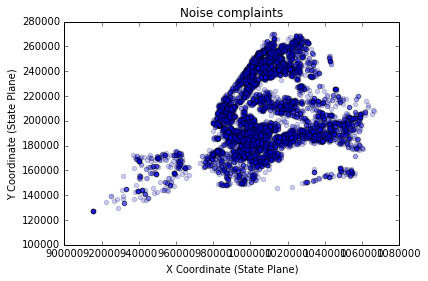

In [125]:
#I can simplu plot with the state plane coordinates to create a poorman's map
ax = dfNoise.plot(x='X Coordinate (State Plane)', 
                  y='Y Coordinate (State Plane)', alpha=0.2,
                 kind='scatter')
ax.set_title("Noise complaints");

__Figure 1:__
origin of all 311 complaints mapped in State Plane coordinates (feet)

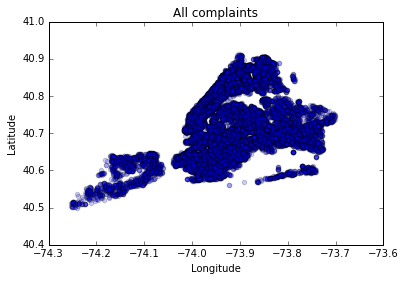

In [126]:
# I can also plot in lat-long 
# though really this is not an accurate way to plot a spherical surface (the Earth) 
# on a flat plane (the screen). We will cover these topics in the future
ax = df1.plot(x='Longitude', y='Latitude', kind="scatter",alpha=0.2)
ax.set_title("All complaints");

__Figure 2:__
origin of all 311 complaints mapped in Geographical Coordinates (Long and Lat)

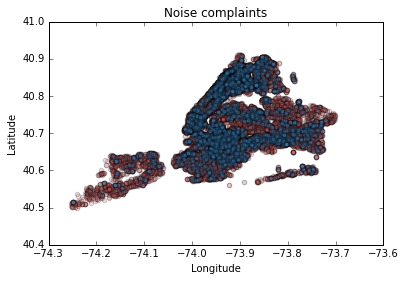

In [127]:
# overplotting the two figes a sense of the predominance of noise complains
ax = df1.plot(x='Longitude', y='Latitude', kind="scatter", 
              alpha=0.2, color="Indianred")
ax.set_title("All complaints")

dfNoise.plot(x='Longitude', y='Latitude', alpha=0.1, 
             kind="scatter", ax=ax, color="SteelBlue")
ax.set_title("Noise complaints");

__Figure 3:__
origin of all 311 complaints related to noise (blue) overplotted all complains (red)

In [128]:
# add a dataframe of crimes

In [129]:
dfCrime = pd.read_csv(PUIdata + "/NYPD_7_Major_Felony_Incidents.csv")
dfCrime.columns

Index([u'OBJECTID', u'Identifier', u'Occurrence Date', u'Day of Week',
       u'Occurrence Month', u'Occurrence Day', u'Occurrence Year',
       u'Occurrence Hour', u'CompStat Month', u'CompStat Day',
       u'CompStat Year', u'Offense', u'Offense Classification', u'Sector',
       u'Precinct', u'Borough', u'Jurisdiction', u'XCoordinate',
       u'YCoordinate', u'Location 1'],
      dtype='object')

In [130]:
dfCrime['Location 1'][0]

'(40.6029515910001, -73.749976261)'

In [131]:
#format longlat from string two 2 floats
dfCrime['Longitude'] = dfCrime['Location 1'].map(lambda x: float(x.replace('(','').replace(')','').split(',')[1]))
dfCrime['Latitude'] = dfCrime['Location 1'].map(lambda x: float(x.replace('(','').replace(')','').split(',')[0]))
dfCrime = dfCrime[:1000]

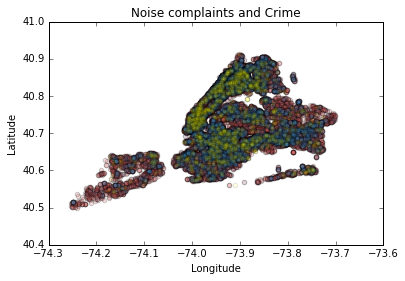

In [132]:
ax = df1.plot(x='Longitude', y='Latitude', kind="scatter", alpha=0.2, color="Indianred")
ax.set_title("All complaints")

dfNoise.plot(x='Longitude', y='Latitude', alpha=0.1, kind="scatter", ax=ax, color="SteelBlue")


dfCrime.plot(x='Longitude', y='Latitude', alpha=0.1, kind="scatter", ax=ax, color="Yellow")
ax.set_title("Noise complaints and Crime");

__Figure 4:__
origin of all 311 complaints related to noise (blue) overplotted all complains (red), 
and Crime statistics for all 7 major fellonies (yellow) (all for a short time spam of a few weeks in the recent past)

# JSON

In [135]:
import json
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib


def get_jsonparsed_data(url):
    """
    from http://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urllib.urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)
jsonData = get_jsonparsed_data(\
                    "https://serv.cusp.nyu.edu/~fbianco/PUIdata/cityWeather.json")
type(jsonData)

dict

In [136]:
# the output of this function is a dictionary. 
# A dictionary is a data type that allows nested structures
# Pandas Dataframes are similar to dictionaries in fact
jsonData

{u'city': {u'coord': {u'lat': 40.714272, u'lon': -74.005966},
  u'country': u'US',
  u'id': 5128581,
  u'name': u'New York',
  u'population': 0},
 u'cnt': 7,
 u'cod': u'200',
 u'list': [{u'clouds': 0,
   u'deg': 173,
   u'dt': 1473696000,
   u'humidity': 80,
   u'pressure': 1018.36,
   u'speed': 1.16,
   u'temp': {u'day': 16.23,
    u'eve': 16.23,
    u'max': 16.23,
    u'min': 16.23,
    u'morn': 16.23,
    u'night': 16.23},
   u'weather': [{u'description': u'clear sky',
     u'icon': u'01n',
     u'id': 800,
     u'main': u'Clear'}]},
  {u'clouds': 0,
   u'deg': 223,
   u'dt': 1473782400,
   u'humidity': 59,
   u'pressure': 1018.67,
   u'speed': 1.43,
   u'temp': {u'day': 24.4,
    u'eve': 27.97,
    u'max': 27.97,
    u'min': 13.39,
    u'morn': 13.39,
    u'night': 20.78},
   u'weather': [{u'description': u'clear sky',
     u'icon': u'01d',
     u'id': 800,
     u'main': u'Clear'}]},
  {u'clouds': 0,
   u'deg': 235,
   u'dt': 1473868800,
   u'humidity': 59,
   u'pressure': 1012.74,

In [137]:
# at each level of the nested structure the content is identified by keys. 
# top level
jsonData.keys()

[u'city', u'message', u'list', u'cod', u'cnt']

In [138]:
# one level inside: lets look into city
jsonData['city'].keys()

[u'country', u'population', u'id', u'coord', u'name']

In [139]:
jsonData['city']

{u'coord': {u'lat': 40.714272, u'lon': -74.005966},
 u'country': u'US',
 u'id': 5128581,
 u'name': u'New York',
 u'population': 0}

In [140]:
# one more level inside
jsonData['city'][u'name'], jsonData['city'][u'population']

(u'New York', 0)

In [141]:
jsonData['city'][u'coord']

{u'lat': 40.714272, u'lon': -74.005966}

In [142]:
type(jsonData['list'])

list

In [143]:
len(jsonData['list'])

7

In [144]:
type(jsonData['list'][0])

dict

In [145]:
jsonData['list']

[{u'clouds': 0,
  u'deg': 173,
  u'dt': 1473696000,
  u'humidity': 80,
  u'pressure': 1018.36,
  u'speed': 1.16,
  u'temp': {u'day': 16.23,
   u'eve': 16.23,
   u'max': 16.23,
   u'min': 16.23,
   u'morn': 16.23,
   u'night': 16.23},
  u'weather': [{u'description': u'clear sky',
    u'icon': u'01n',
    u'id': 800,
    u'main': u'Clear'}]},
 {u'clouds': 0,
  u'deg': 223,
  u'dt': 1473782400,
  u'humidity': 59,
  u'pressure': 1018.67,
  u'speed': 1.43,
  u'temp': {u'day': 24.4,
   u'eve': 27.97,
   u'max': 27.97,
   u'min': 13.39,
   u'morn': 13.39,
   u'night': 20.78},
  u'weather': [{u'description': u'clear sky',
    u'icon': u'01d',
    u'id': 800,
    u'main': u'Clear'}]},
 {u'clouds': 0,
  u'deg': 235,
  u'dt': 1473868800,
  u'humidity': 59,
  u'pressure': 1012.74,
  u'rain': 2.1,
  u'speed': 1.86,
  u'temp': {u'day': 27.06,
   u'eve': 29.59,
   u'max': 30.38,
   u'min': 18.72,
   u'morn': 19.93,
   u'night': 18.72},
  u'weather': [{u'description': u'light rain',
    u'icon': u'10d

In [146]:
jsonData['list'][0]

{u'clouds': 0,
 u'deg': 173,
 u'dt': 1473696000,
 u'humidity': 80,
 u'pressure': 1018.36,
 u'speed': 1.16,
 u'temp': {u'day': 16.23,
  u'eve': 16.23,
  u'max': 16.23,
  u'min': 16.23,
  u'morn': 16.23,
  u'night': 16.23},
 u'weather': [{u'description': u'clear sky',
   u'icon': u'01n',
   u'id': 800,
   u'main': u'Clear'}]}

Populating the interactive namespace from numpy and matplotlib


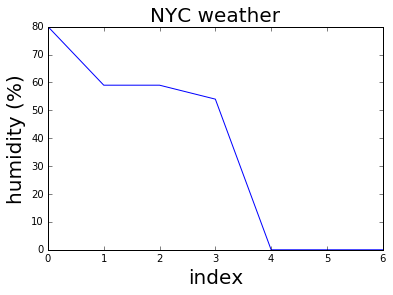

In [147]:
import pylab as pl
%pylab inline
#some effort is required to extract the info I want
pl.plot([jsonData['list'][i][u'humidity'] 
         for i in range(len(jsonData['list']))])
pl.title("NYC weather", fontsize=20)
pl.xlabel("index", fontsize=20)
pl.ylabel("humidity (%)", fontsize=20);

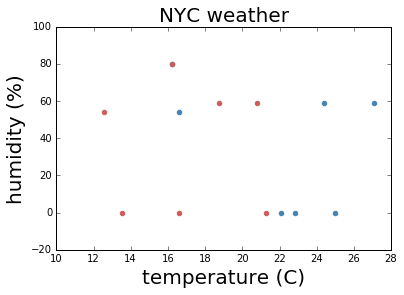

In [148]:
pl.scatter([jsonData['list'][i][u'temp']['day'] 
         for i in range(len(jsonData['list']))], 
        [jsonData['list'][i][u'humidity'] 
         for i in range(len(jsonData['list']))], color='SteelBlue')

pl.scatter([jsonData['list'][i][u'temp']['night'] 
         for i in range(len(jsonData['list']))], 
        [jsonData['list'][i][u'humidity'] 
         for i in range(len(jsonData['list']))], color='IndianRed')
pl.title("NYC weather", fontsize=20)
pl.xlabel("temperature (C)", fontsize=20)
pl.ylabel("humidity (%)", fontsize=20);